### Business Problem

The advertising dataset consists of the sales of a product in 200 different markets, along with advertising budgets for three different media: TV, radio, and newspaper. We’ll use the dataset to predict the amount of sales (dependent variable), based on the TV, radio and newspaper advertising budgets (independent variables).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import statsmodels.formula.api as smf

In [2]:
os.getcwd()

'C:\\Users\\navjo\\Desktop\\ML\\ML 40 projects\\PersonalProjects'

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Metadata/Data Inspection

In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
# first column has repeating index values,so we will drop the Unnamed colum

In [11]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [12]:
# Assumptions
# Linear relationship of independent & dependent variable

C:\Users\navjo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


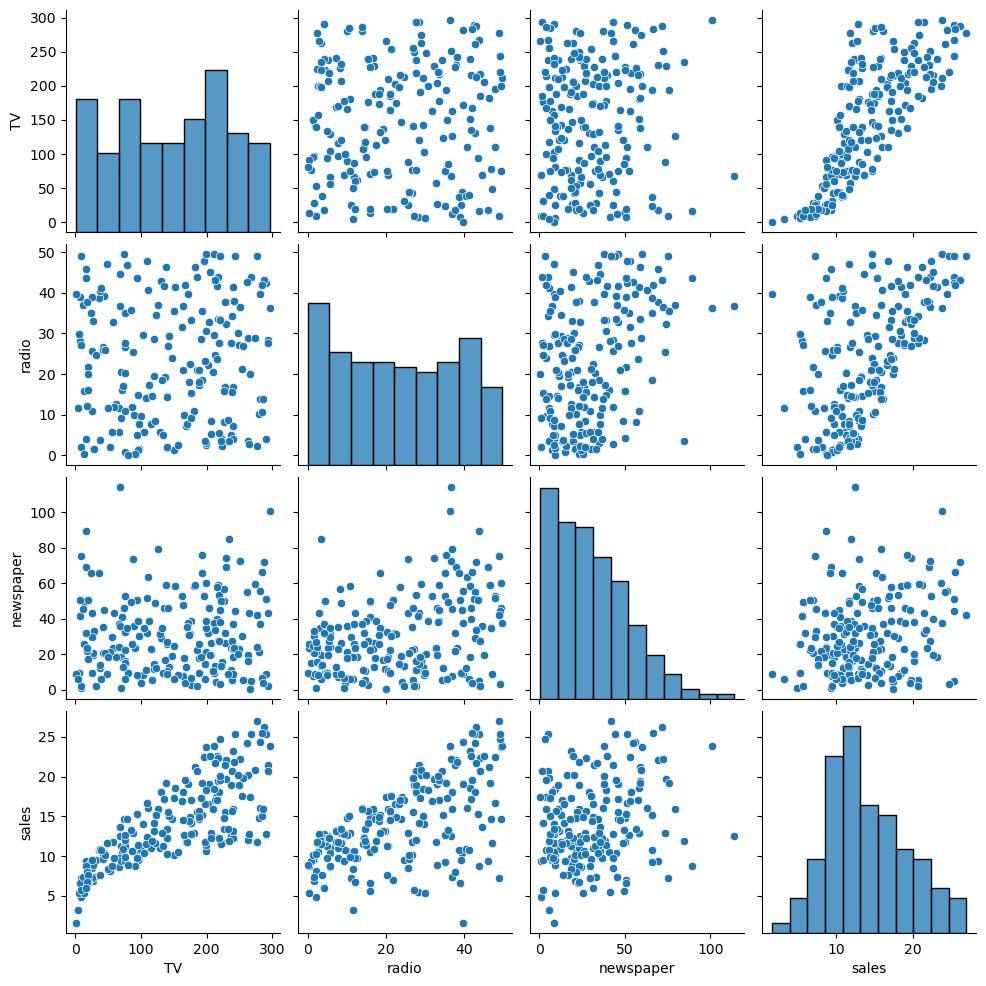

In [13]:
sns.pairplot(df)

We can check the realtionship of TV, Radio, Newsapaper with Sales:
- For TV relationship seems strong
- For Radio little less strong
- For newspaper almost negligible

<Axes: >

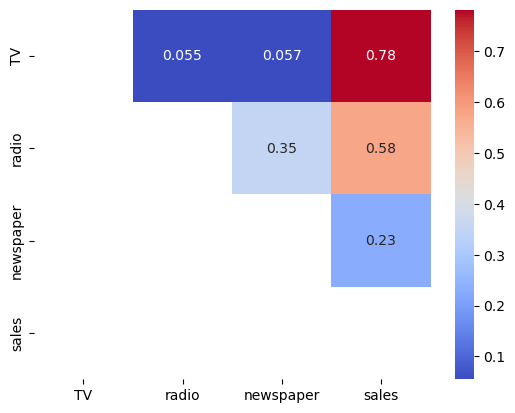

In [14]:
# to verify numerically we can see the heatmap correlation
mask = np.tril(df.corr()) # lower triangle 'tril' is masked to focuss on correlation
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', mask = mask)

In [15]:
# we can relate the scatterplot & heat map values, 
# strongest positive coorleation between sales & TV, while relationship between newspaper & sales is close to 0

In [16]:
# we divide the variables into two sets 
# X inependent variable
X = df.drop(['sales'], axis = 1)
# y = dependent variable
y = df['sales']

<Axes: ylabel='Density'>

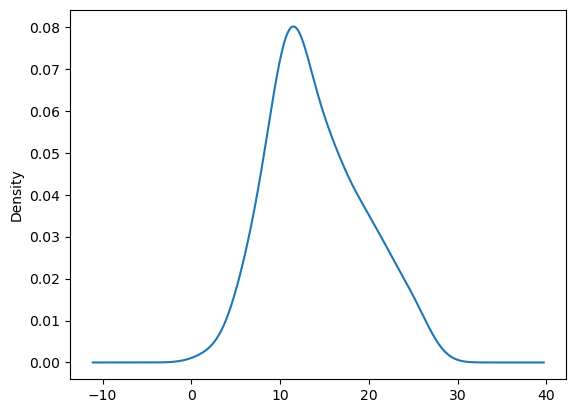

In [17]:
# check noralization of the y variable 
y.plot(kind = 'kde')

In [18]:
# Split the dataset into train & test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
#random_state parameter is used for initializing the internal random number generator, 
#which will decide the splitting of data into train and test indices in your case. I set random state = 0 
#so that you can compare your output over multiple runs of the code using the same parameter

In [19]:
 # divided data into 70 & 30%

In [20]:
# Build Model
Model = LinearRegression()

In [21]:
# Train model, fitting your model to the training data
Model.fit(X_train,y_train)

LinearRegression()

In [22]:
# predict
y_predict = Model.predict(X_test)

In [23]:
y_predict

array([10.05866652,  7.43318827,  6.95305695, 24.16874598, 11.98172029,
        6.54464708, 13.19426793, 14.90240334, 11.07675294, 16.25061663,
       23.0081158 ,  9.12072148, 10.29342297, 15.3709661 , 11.62396513,
       12.1057432 , 18.55030805, 10.85810888, 16.13879856, 17.20281404,
       24.25469939,  9.43869821, 15.13419408, 12.41283844,  5.66973859,
       15.23876681, 12.1878762 , 20.95164149, 13.22671807,  9.20954724,
       13.39812727, 21.61944517, 18.05938674, 21.14798547,  6.73582996,
        6.16799717,  7.98042607, 13.09083488, 14.86214078,  6.23597127,
       12.35246911,  9.19452235, 15.04717679, 16.23039254, 17.17240889,
       13.3341216 ,  3.68035786, 12.53946851, 15.93674769,  8.67881357,
       10.62459997, 19.5646526 , 18.3472282 , 15.24662975, 10.04846378,
        8.17344188, 21.49061088, 14.137309  , 16.29760212,  8.90502274])

In [24]:
Model.intercept_

2.880255286331323

In [25]:
Model.coef_

array([0.04391531, 0.20027962, 0.00184368])

In [26]:
# lets see output of the models
pd.DataFrame(Model.coef_,index = X.columns,columns =['Coefficient'])

,Coefficient
TV,0.043915
radio,0.200280
newspaper,0.001844


In [27]:
# Example
example = [50, 30, 10]
output = Model.intercept_ + sum(example*Model.coef_)

In [28]:
output

11.102846303480495

In [29]:
# evaluate the performance 
# the quality of the model is related to how well the model is predicting against the actual values of testing dataset
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R Squared Score is:', r2_score(y_test, y_predict))

Mean Absolute Error: 1.2333759522850205
Mean Squared Error: 3.6913948456986074
Root Mean Squared Error: 1.9213003007595162
R Squared Score is: 0.8649018906637792


In [30]:
# How to interpret & improve our model

# model statistics over the training data
f = X.columns.tolist()
usethis = '+'.join(f)
print(usethis)

TV+radio+newspaper


In [31]:
formula = 'sales~TV+radio+newspaper'
print(smf.ols(formula, df).fit().summary()) 

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           1.58e-96
Time:                        18:05:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
# Ajusted R2 & R2 are almost same values, it means no variables are penalized

In [33]:
# F statistics &  Prob(F statsistics): tell us that the results are against the nulll hypothesis & 
# there is much less than 1% probability that the F-statistic of 570 could have occurred by chance under the assumption of a valid Null hypothesis.
# p values of t test 